# Modeling Sentiment Analysis UAS Data Mining II Kelompok 12

## Import Library dan Subset Data

In [2]:
# pip install bertopic==0.15.0


In [3]:
# pip install --force-reinstall "numba==0.57.1" "llvmlite==0.40.1" "hdbscan==0.8.33"

In [4]:
# !pip uninstall -y transformers tokenizers
# !pip install "transformers==4.37.2" "tokenizers==0.15.2"

In [5]:
# !pip uninstall -y transformers peft accelerate
# !pip install transformers==4.37.2
# !pip install peft==0.8.2
# !pip install accelerate==0.27.2


In [6]:
# import transformers, peft
# print(transformers.__version__)
# print(peft.__version__)


In [7]:
# !pip install --upgrade --force-reinstall transformers==4.33.2
# !pip install --upgrade --force-reinstall peft==0.5.0


In [8]:
!pip install -q --upgrade transformers accelerate datasets

In [9]:
# ==========================================
# 1. STANDARD LIBRARY & UTILITIES
# ==========================================
import os
import sys
import re
import string
import time
import shutil
import pickle
import warnings

# ==========================================
# 2. DATA MANIPULATION & VISUALIZATION
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# ==========================================
# 3. NLP & TEXT PROCESSING (NON-DL)
# ==========================================
!pip install sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from gensim.models import Word2Vec

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# ==========================================
# 4. SCIKIT-LEARN (MACHINE LEARNING)
# ==========================================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    classification_report, 
    confusion_matrix
)

from sklearn.linear_model import (
    LogisticRegression, 
    RidgeClassifier, 
    SGDClassifier, 
    PassiveAggressiveClassifier, 
    Perceptron
)
from sklearn.svm import LinearSVC, SVC, NuSVC

from sklearn.naive_bayes import (
    MultinomialNB, 
    BernoulliNB, 
    ComplementNB, 
    GaussianNB
)

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    ExtraTreesClassifier
)

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier

# ==========================================
# 5. BOOSTING LIBRARIES (Safe Import)
# ==========================================
try:
    from xgboost import XGBClassifier
except ImportError:
    XGBClassifier = None

try:
    from lightgbm import LGBMClassifier
except ImportError:
    LGBMClassifier = None

try:
    from catboost import CatBoostClassifier
except ImportError:
    CatBoostClassifier = None

# ==========================================
# 6. DEEP LEARNING (PYTORCH & TRANSFORMERS)
# ==========================================
import torch
from torch import nn
from datasets import Dataset

from transformers import (
    AutoTokenizer, 
    AutoModel, 
    AutoModelForSequenceClassification, 
    TrainingArguments, 
    Trainer, 
    EarlyStoppingCallback
)

from peft import get_peft_model, LoraConfig, TaskType

# ==========================================
# 7. ADVANCED TOPIC MODELING
# ==========================================
!pip install bertopic
!pip install --upgrade protobuf==3.20.*
!pip install bertopic==0.15.0 scikit-learn==1.2.2
from bertopic import BERTopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.0 MB/s eta 0:00:00


2025-12-07 08:43:04.702457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765096985.019770      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765096985.105691      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 83.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    U

In [10]:
df = pd.read_excel("/kaggle/input/data-fix-datmin-kelompok-12/Data Datmin II_Kelompok 12.xlsx")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2000 non-null   float64
 1   created_at               2000 non-null   object 
 2   favorite_count           2000 non-null   int64  
 3   full_text                2000 non-null   object 
 4   id_str                   2000 non-null   float64
 5   image_url                668 non-null    object 
 6   in_reply_to_screen_name  872 non-null    object 
 7   lang                     2000 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              2000 non-null   int64  
 10  reply_count              2000 non-null   int64  
 11  retweet_count            2000 non-null   int64  
 12  tweet_url                2000 non-null   object 
 13  user_id_str              2000 non-null   float64
 14  Sentimen                

In [12]:
df.isna().sum()

Unnamed: 0                    0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  1332
in_reply_to_screen_name    1128
lang                          0
location                   2000
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
Sentimen                      0
dtype: int64

In [13]:
df['Sentimen'].value_counts()

Sentimen
2    742
1    654
0    604
Name: count, dtype: int64

## Data Cleaning & Understanding

Total Data Awal: 2000
Sedang membersihkan data...
-> Dihapus karena kosong/simbol: 2 data
-> Dihapus karena duplikat: 74 data
Total Data Akhir: 1924

CONTOH DATA YANG DIHAPUS

--- [Contoh 1] Dihapus karena isinya hanya Link/Simbol ---
https://t.co/DXCLSBDCHP
https://t.co/6d3wL4JNVP

--- [Contoh 2] Dihapus karena Duplikat (Spam/Bot) ---
@DPR_RI Izin menolak ruu kuhap isinya terlalu m...
Rancangan Undang-Undang Kitab Undang-undang Huk...
DUKUNG PENGESAHAN RUU KUHAP! https://t.co/8H64X...


<Figure size 1000x600 with 0 Axes>

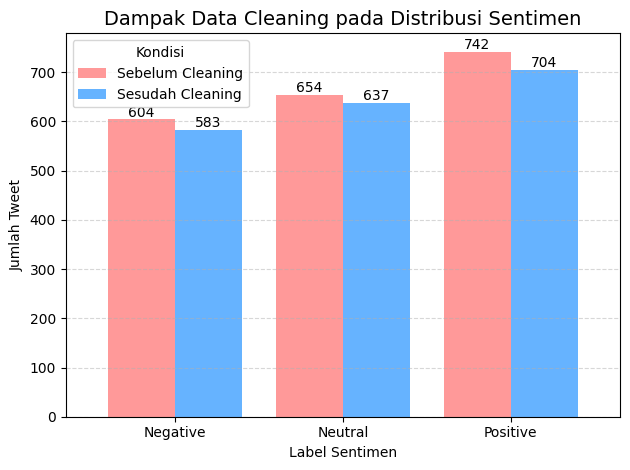

In [14]:
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df['label_desc'] = df['Sentimen'].map(label_map)

df = df.dropna(subset=['full_text', 'label_desc'])

dist_before = df['label_desc'].value_counts().sort_index()
print(f"Total Data Awal: {len(df)}")

def cleaning_text(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    text = re.sub(r'\n', ' ', text)                  
    text = re.sub(r'http\S+', '', text)              
    text = re.sub(r'www\.\S+', '', text)             
    text = re.sub(r'@\w+', '', text)                 
    text = re.sub(r'#\w+', '', text)                 
    text = re.sub(r'\d+', '', text)                  
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub(r'\s+', ' ', text).strip()         
    return text

print("Sedang membersihkan data...")
df['clean_text'] = df['full_text'].apply(cleaning_text)

deleted_empty = df[df['clean_text'] == ""]
print(f"-> Dihapus karena kosong/simbol: {len(deleted_empty)} data")

df = df[df['clean_text'] != ""]

duplicates = df[df.duplicated(subset=['clean_text'], keep='first')]
print(f"-> Dihapus karena duplikat: {len(duplicates)} data")

df = df.drop_duplicates(subset=['clean_text'], keep='first')

dist_after = df['label_desc'].value_counts().sort_index()
print(f"Total Data Akhir: {len(df)}")

print("\n" + "="*50)
print("CONTOH DATA YANG DIHAPUS")
print("="*50)

print("\n--- [Contoh 1] Dihapus karena isinya hanya Link/Simbol ---")
if not deleted_empty.empty:
    print(deleted_empty['full_text'].head(3).to_string(index=False))
else:
    print("(Tidak ada data kosong)")

print("\n--- [Contoh 2] Dihapus karena Duplikat (Spam/Bot) ---")
if not duplicates.empty:
    print(duplicates['full_text'].head(3).to_string(index=False))
else:
    print("(Tidak ada duplikat)")

comp_df = pd.DataFrame({
    'Sebelum Cleaning': dist_before,
    'Sesudah Cleaning': dist_after
}).fillna(0)
plt.figure(figsize=(10, 6))
ax = comp_df.plot(kind='bar', color=['#ff9999', '#66b3ff'], width=0.8)

plt.title('Dampak Data Cleaning pada Distribusi Sentimen', fontsize=14)
plt.ylabel('Jumlah Tweet')
plt.xlabel('Label Sentimen')
plt.xticks(rotation=0)
plt.legend(title='Kondisi')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
norm_dict = {
    # Ganti Kata Dasar / Singkatan Umum
    'yg': 'yang', 'dgn': 'dengan', 'dlm': 'dalam', 'sdh': 'sudah', 'dh': 'sudah',
    'udh': 'sudah', 'blm': 'belum', 'lom': 'belum', 'krn': 'karena', 'karna': 'karena',
    'bgt': 'banget', 'bgit': 'banget', 'banged': 'banget', 'dr': 'dari', 'kpn': 'kapan',
    'ma': 'sama', 'sm': 'sama', 'utk': 'untuk', 'tuk': 'untuk', 'tujuan': 'tujuan',
    'tp': 'tapi', 'tpi': 'tapi', 'tetep': 'tetap', 'jd': 'jadi', 'jdi': 'jadi',
    'jga': 'juga', 'jg': 'juga', 'cm': 'cuma', 'cma': 'cuma', 'cuman': 'cuma',
    'org': 'orang', 'orng': 'orang', 'bkn': 'bukan', 'tau': 'tahu', 'tw': 'tahu',
    'mw': 'mau', 'mo': 'mau', 'msh': 'masih', 'bs': 'bisa', 'bisaa': 'bisa',
    'sy': 'saya', 'gw': 'saya', 'gue': 'saya', 'aku': 'saya', 'ak': 'saya',
    'lu': 'kamu', 'lo': 'kamu', 'oe': 'kamu', 'km': 'kamu', 'kmu': 'kamu',
    'kalian': 'kalian', 'klian': 'kalian', 'mrk': 'mereka', 'dy': 'dia',
    'kalo': 'kalau', 'klo': 'kalau', 'klu': 'kalau', 'kl': 'kalau',
    'tdk': 'tidak', 'tak': 'tidak', 'gk': 'tidak', 'ga': 'tidak', 'gak': 'tidak',
    'engga': 'tidak', 'enggak': 'tidak', 'gakk': 'tidak', 'ngga': 'tidak',
    'jgn': 'jangan', 'jan': 'jangan', 'sh': 'sih', 'sih': 'sih', 'si': 'sih',
    'dong': 'dong', 'dung': 'dong', 'donk': 'dong', 'deh': 'deh', 'dah': 'deh',
    'kok': 'kok', 'koq': 'kok', 'nya': 'nya', 'ny': 'nya', 'x': 'nya',
    'bnyak': 'banyak', 'banyak': 'banyak', 'dikit': 'sedikit', 'ikit': 'sedikit',
    'emg': 'memang', 'emang': 'memang', 'mang': 'memang', 'bener': 'benar',
    'bnr': 'benar', 'slah': 'salah', 'salah': 'salah', 'knp': 'kenapa',
    'napa': 'kenapa', 'knapa': 'kenapa', 'gmn': 'bagaimana', 'gmna': 'bagaimana',
    'gini': 'begini', 'gitu': 'begitu', 'gtu': 'begitu', 'skrg': 'sekarang',
    'bsok': 'besok', 'lusa': 'lusa', 'kemarin': 'kemarin', 'kmrin': 'kemarin',
    'barusan': 'barusan', 'brusan': 'barusan', 'trus': 'terus', 'trs': 'terus',
    'lg': 'lagi', 'lagi': 'lagi', 'lgi': 'lagi', 'thn': 'tahun', 'bln': 'bulan',
    'mnggu': 'minggu', 'hari': 'hari', 'jam': 'jam', 'menit': 'menit',
    'dtg': 'datang', 'plg': 'pulang', 'mkn': 'makan', 'minum': 'minum',
    'tdr': 'tidur', 'liat': 'lihat', 'lht': 'lihat', 'baca': 'baca',
    'tulis': 'tulis', 'denger': 'dengar', 'dngr': 'dengar', 'ngomong': 'bicara',
    'blg': 'bilang', 'bilang': 'bilang', 'kasih': 'beri', 'ksh': 'beri',
    'minta': 'minta', 'ambil': 'ambil', 'taruh': 'letak', 'simpan': 'simpan',
    'buang': 'buang', 'cari': 'cari', 'ketemu': 'temu', 'ktmu': 'temu',
    'bantu': 'bantu', 'tolong': 'tolong', 'tlg': 'tolong', 'maaf': 'maaf',
    'sori': 'maaf', 'sorry': 'maaf', 'makasih': 'terima kasih', 'tq': 'terima kasih',
    'thanks': 'terima kasih', 'thx': 'terima kasih', 'ok': 'oke', 'oke': 'oke',
    'sip': 'oke', 'yup': 'ya', 'yap': 'ya', 'iya': 'ya', 'ya': 'ya',
    'tidak': 'tidak', 'bukan': 'bukan', 'blm': 'belum', 'sdh': 'sudah',
    'ok': 'baik', 'oke': 'baik', 'sip': 'baik', 'baek': 'baik', 'baik': 'baik',
    'bagus': 'bagus', 'bgs': 'bagus', 'jelek': 'buruk', 'jlk': 'buruk',
    'buruk': 'buruk', 'keren': 'keren', 'mantap': 'mantap', 'top': 'bagus',
    'gila': 'gila', 'parah': 'parah', 'anjir': 'anjing', 'njir': 'anjing',
    'bgst': 'bangsat', 'wkwk': 'tertawa', 'wkwkwk': 'tertawa', 'haha': 'tertawa',
    'hehe': 'tertawa', 'hihi': 'tertawa', 'huhu': 'sedih', 'hiks': 'sedih',

    # Kata Kunci Spesifik Dataset (RUU KUHAP)
    'ruu': 'rancangan undang undang',
    'kuhap': 'kitab undang undang hukum acara pidana',
    'uu': 'undang undang',
    'dpr': 'dewan perwakilan rakyat',
    'ri': 'republik indonesia',
    'polri': 'kepolisian republik indonesia',
    'tni': 'tentara nasional indonesia',
    'kpk': 'komisi pemberantasan korupsi',
    'ham': 'hak asasi manusia',
    'presiden': 'presiden',
    'jokowi': 'joko widodo',
    'prabowo': 'prabowo subianto',
    'gibran': 'gibran rakabuming raka',
    'anies': 'anies baswedan',
    'ganjar': 'ganjar pranowo',
    'mahfud': 'mahfud md',
    'cak imin': 'muhaimin iskandar',
    'kpu': 'komisi pemilihan umum',
    'bawaslu': 'badan pengawas pemilihan umum',
    'mk': 'mahkamah konstitusi',
    'ma': 'mahkamah agung',
    'ky': 'komisi yudisial',
    'setuju': 'setuju',
    'tolak': 'tolak',
    'dukung': 'dukung',
    'sah': 'sah',
    'resmi': 'resmi',
    'demo': 'demonstrasi',
    'aksi': 'aksi',
    'damai': 'damai',
    'rusuh': 'rusuh',
    'korupsi': 'korupsi',
    'kolusi': 'kolusi',
    'nepotisme': 'nepotisme',
    'adil': 'adil',
    'makmur': 'makmur',
    'sejahtera': 'sejahtera',
    'aman': 'aman',
    'damai': 'damai',
    'indonesia': 'indonesia',
    'nkri': 'negara kesatuan republik indonesia',
    'pancasila': 'pancasila',
    'uud': 'undang undang dasar',
    '1945': 'sembilan belas empat lima'
}

factory_sw = StopWordRemoverFactory()
base_stopwords = factory_sw.get_stop_words()
exceptions = {'tidak', 'bukan', 'belum', 'jangan', 'tapi', 'tetapi', 'melainkan', 'padahal', 'kurang'}
final_stopwords = set([word for word in base_stopwords if word not in exceptions])

factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()

def ultimate_preprocessing(text):
    if not isinstance(text, str): return ""
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    words = text.split()
    clean_words = []

    for word in words:
        if word in norm_dict:
            word = norm_dict[word]

        if word not in final_stopwords:
            clean_words.append(word)

    return " ".join(clean_words)

print("Sedang melakukan Ultimate Preprocessing (Normalisasi + Stopwords)...")
df['clean_text_final'] = df['clean_text'].apply(ultimate_preprocessing)

df = df[df['clean_text_final'] != ""]

print("\n" + "="*50)
print("HASIL AKHIR KUALITAS DATA")
print("="*50)
print(df[['clean_text', 'clean_text_final']].head(10))

df.to_csv('data_kuhap_final_clean.csv', index=False)
print("\nData bersih tersimpan sebagai 'data_kuhap_final_clean.csv'. Siap untuk Modeling!")

Sedang melakukan Ultimate Preprocessing (Normalisasi + Stopwords)...

HASIL AKHIR KUALITAS DATA
                                           clean_text  \
0   banyak yg bilang praktekâ² yg ada di ruu kuhap...   
1      izin menolak ruu kuhap isinya terlalu mengatur   
2   zionis selalu geser gawang wkwkwkwk sok bahas ...   
4   ruu kuhap ini bikin makin percaya sama hukum g...   
5   pasalpasal itu bakal membuka perlakuan sewenan...   
6    mau teriakin wowo ah ntar jangan sahin ruu kuhap   
7   ruu kuhap yang menimbulkan kontroversi di kala...   
8   demo tolak ruu kuhap ini digagas oleh badan ek...   
9   ruu kuhap yang baru disahkan dpr jadi uu menga...   
10  serius ini pada mau diam saja ruu perampasan a...   

                                     clean_text_final  
0   banyak bilang praktekâ² rancangan undang undan...  
1   izin menolak rancangan undang undang kitab und...  
2   zionis selalu geser gawang wkwkwkwk sok bahas ...  
4   rancangan undang undang kitab undang undang hu..

## Data Preprcessing

In [16]:
print("Loading data...")
df = pd.read_csv('/kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv')

df['clean_text_final'] = df['clean_text_final'].fillna("")
X_text = df['clean_text_final'].values
y = df['Sentimen'].values 
features = {}

print("\n[1/5] Extracting Bag of Words (BoW)...")
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(X_text).toarray()
features['BoW'] = X_bow
print(f"Shape: {X_bow.shape}")

print("\n[2/5] Extracting TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X_text).toarray()
features['TF-IDF'] = X_tfidf
print(f"Shape: {X_tfidf.shape}")

print("\n[3/5] Extracting Word2Vec (Average)...")
# Tokenisasi sederhana untuk Gensim
tokenized_text = [text.split() for text in X_text]

w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv.key_to_index]
    if len(doc) == 0:
        return np.zeros(100)
    return np.mean(w2v_model.wv[doc], axis=0)

X_w2v = np.array([document_vector(text) for text in tokenized_text])
features['Word2Vec'] = X_w2v
print(f"Shape: {X_w2v.shape}")

def get_bert_embeddings(text_list, model_name):
    print(f"Loading {model_name}...")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    # Pindahkan ke GPU jika tersedia agar cepat
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    embeddings = []

    batch_size = 32
    for i in tqdm(range(0, len(text_list), batch_size), desc=f"Processing {model_name}"):
        batch_texts = text_list[i:i+batch_size]

        # Tokenisasi
        inputs = tokenizer(list(batch_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state
        mean_pooled = last_hidden_state.mean(dim=1)

        embeddings.append(mean_pooled.cpu().numpy())

    return np.concatenate(embeddings, axis=0)

print("\n[4/5] Extracting IndoBERT Embeddings...")
try:
    X_indobert = get_bert_embeddings(X_text, "indobenchmark/indobert-base-p1")
    features['IndoBERT'] = X_indobert
    print(f"Shape: {X_indobert.shape}")
except Exception as e:
    print(f"Gagal memproses IndoBERT: {e}")

print("\n[5/5] Extracting IndoTweet Embeddings...")
try:
    X_indotweet = get_bert_embeddings(X_text, "indolem/indobertweet-base-uncased")
    features['IndoTweet'] = X_indotweet
    print(f"Shape: {X_indotweet.shape}")
except Exception as e:
    print(f"Gagal memproses IndoTweet: {e}")

print("\nMenyimpan semua fitur ke 'features_data.pkl'...")
data_pack = {
    'y': y,
    'features': features
}

with open('features_data.pkl', 'wb') as f:
    pickle.dump(data_pack, f)

print("Selesai! File 'features_data.pkl' siap digunakan untuk 125 eksperimen modeling.")

Loading data...

[1/5] Extracting Bag of Words (BoW)...
Shape: (1924, 5000)

[2/5] Extracting TF-IDF...
Shape: (1924, 5000)

[3/5] Extracting Word2Vec (Average)...
Shape: (1924, 100)

[4/5] Extracting IndoBERT Embeddings...
Loading indobenchmark/indobert-base-p1...


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Processing indobenchmark/indobert-base-p1:   0%|          | 0/61 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Shape: (1924, 768)

[5/5] Extracting IndoTweet Embeddings...
Loading indolem/indobertweet-base-uncased...


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Processing indolem/indobertweet-base-uncased:   0%|          | 0/61 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Shape: (1924, 768)

Menyimpan semua fitur ke 'features_data.pkl'...
Selesai! File 'features_data.pkl' siap digunakan untuk 125 eksperimen modeling.


## Modeling (Screening)

Loading Features Data...

🚀 MULAI SCREENING: 5 Features x 25 Models = 125 Iterations


Total Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Testing BoW:   0%|          | 0/25 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 1539, number of used features: 205
[LightGBM] [Info] Start training from score -1.214205
[LightGBM] [Info] Start training from score -1.054754
[LightGBM] [Info] Start training from score -1.036269


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d6b805f1b20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


✅ BoW Done. Best: Multinomial NB (F1: 0.7350)


Testing TF-IDF:   0%|          | 0/25 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5700
[LightGBM] [Info] Number of data points in the train set: 1539, number of used features: 205
[LightGBM] [Info] Start training from score -1.214205
[LightGBM] [Info] Start training from score -1.054754
[LightGBM] [Info] Start training from score -1.036269
✅ TF-IDF Done. Best: Random Forest (F1: 0.7308)


Testing Word2Vec:   0%|          | 0/25 [00:00<?, ?it/s]

✅ Word2Vec Done. Best: Linear SVC (F1: 0.6687)


Testing IndoBERT:   0%|          | 0/25 [00:00<?, ?it/s]

✅ IndoBERT Done. Best: XGBoost (F1: 0.7700)


Testing IndoTweet:   0%|          | 0/25 [00:00<?, ?it/s]

✅ IndoTweet Done. Best: SVM (Poly) (F1: 0.7735)


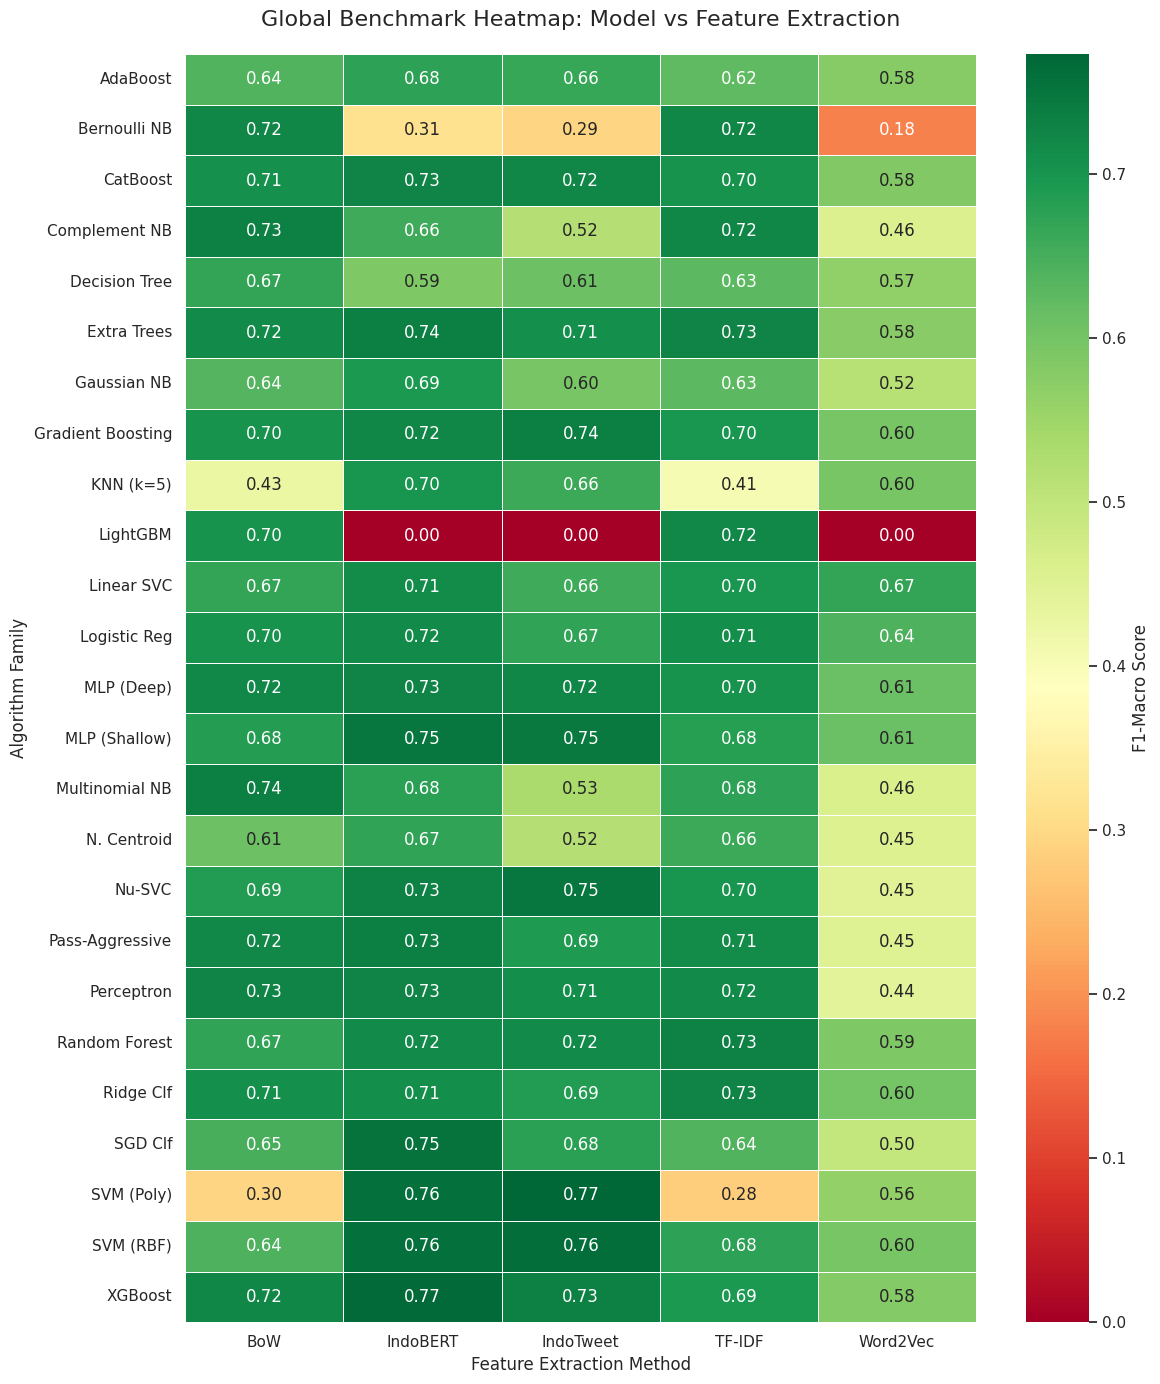

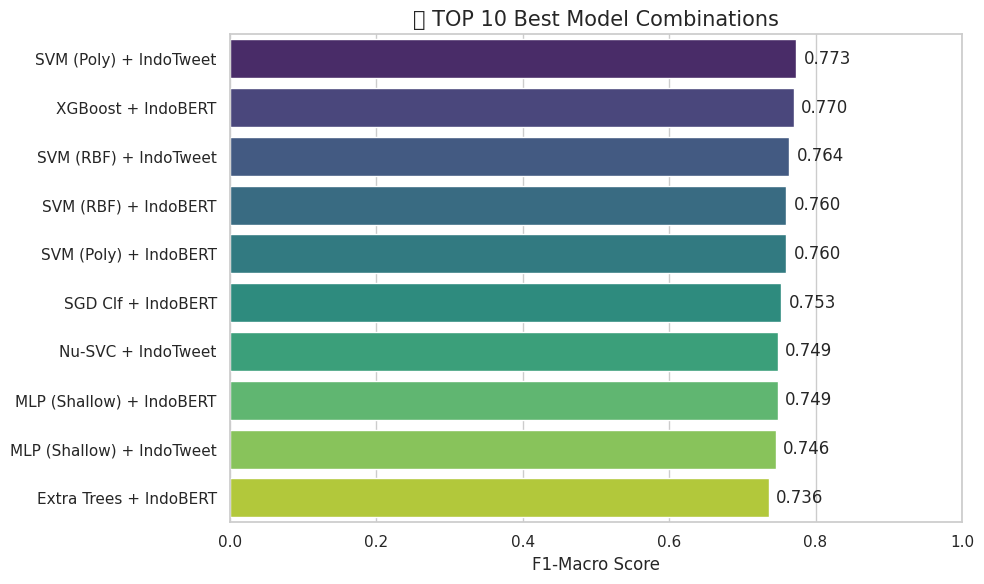

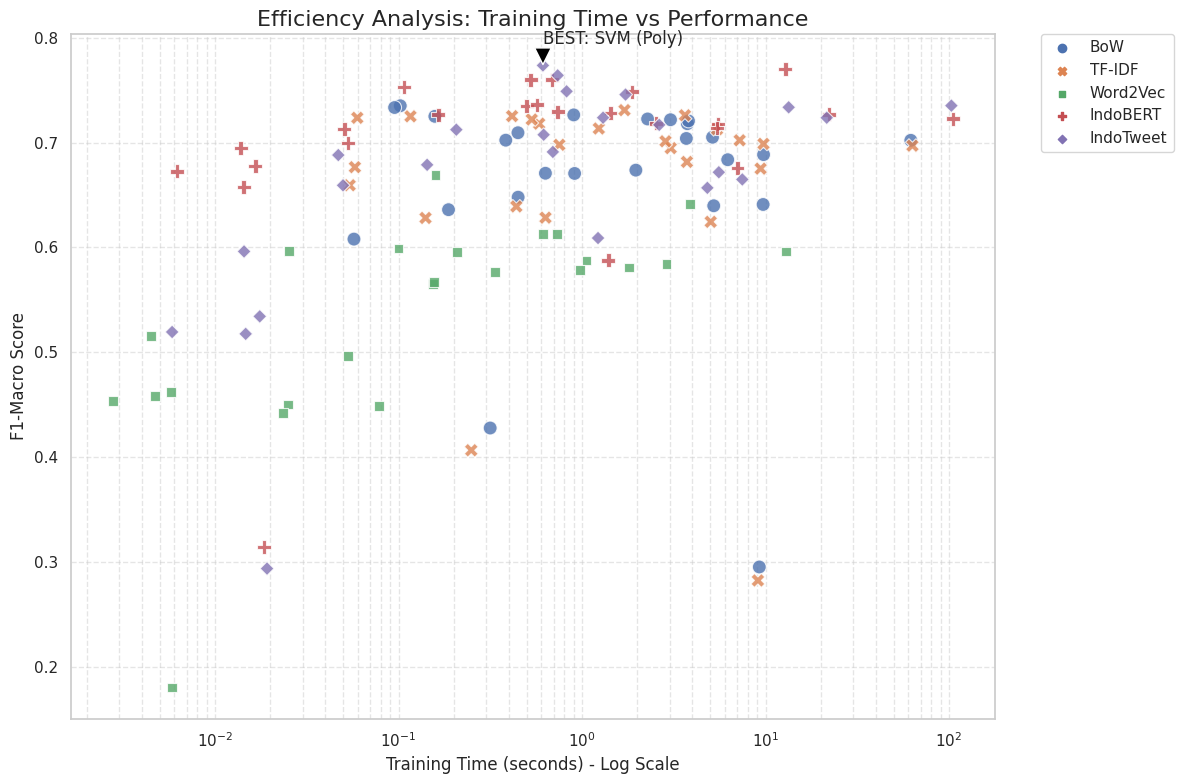


🎉 EKSPERIMEN SELESAI!
1. Cek '1_benchmark_heatmap.png' untuk melihat peta kekuatan model.
2. Cek '2_leaderboard_top10.png' untuk melihat juara bertahan.
3. Cek '3_efficiency_plot.png' untuk analisis kecepatan.
4. Data lengkap tersimpan di 'benchmark_results_final.csv'


In [17]:
def get_models():
    models = {}
    # A. Linear
    models['Logistic Reg'] = LogisticRegression(max_iter=1000, class_weight='balanced')
    models['Ridge Clf'] = RidgeClassifier(class_weight='balanced')
    models['SGD Clf'] = SGDClassifier(class_weight='balanced', early_stopping=True)
    models['Pass-Aggressive'] = PassiveAggressiveClassifier(class_weight='balanced')
    models['Perceptron'] = Perceptron(class_weight='balanced')
    # B. SVM
    models['Linear SVC'] = LinearSVC(dual=False, class_weight='balanced')
    models['SVM (RBF)'] = SVC(kernel='rbf', class_weight='balanced')
    models['SVM (Poly)'] = SVC(kernel='poly', degree=2, class_weight='balanced')
    models['Nu-SVC'] = NuSVC(nu=0.1)
    # C. Naive Bayes
    models['Multinomial NB'] = MultinomialNB()
    models['Bernoulli NB'] = BernoulliNB()
    models['Complement NB'] = ComplementNB()
    models['Gaussian NB'] = GaussianNB()
    # D. Tree & Ensemble
    models['Decision Tree'] = DecisionTreeClassifier(class_weight='balanced')
    models['Random Forest'] = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    models['Extra Trees'] = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
    models['AdaBoost'] = AdaBoostClassifier(n_estimators=50)
    models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=100)
    if XGBClassifier: models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100)
    if LGBMClassifier: models['LightGBM'] = LGBMClassifier(n_estimators=100)
    if CatBoostClassifier: models['CatBoost'] = CatBoostClassifier(verbose=0, n_estimators=100)
    # E. Distance & Neural
    models['KNN (k=5)'] = KNeighborsClassifier(n_neighbors=5)
    models['N. Centroid'] = NearestCentroid()
    models['MLP (Shallow)'] = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
    models['MLP (Deep)'] = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500)
    return models

print("Loading Features Data...")
with open('features_data.pkl', 'rb') as f:
    data_pack = pickle.load(f)

y = data_pack['y']
features_dict = data_pack['features']

results = []
models_list = get_models()

print(f"\n🚀 MULAI SCREENING: {len(features_dict)} Features x {len(models_list)} Models = {len(features_dict)*len(models_list)} Iterations")
print("="*80)

pbar_outer = tqdm(features_dict.items(), desc="Total Progress", position=0)

for feature_name, X in pbar_outer:

    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    pbar_inner = tqdm(models_list.items(), desc=f"Testing {feature_name}", leave=False, position=1)

    best_f1_in_batch = 0
    best_model_in_batch = ""

    for model_name, model in pbar_inner:
        start_time = time.time()
        error_msg = None
        acc, f1 = 0, 0

        try:
            X_train, X_test = X_train_raw.copy(), X_test_raw.copy()

            is_nb = "NB" in model_name and "Gaussian" not in model_name
            if is_nb and (X_train.min() < 0):
                scaler = MinMaxScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

            if "Gaussian" in model_name and hasattr(X_train, "toarray"):
                X_train = X_train.toarray()
                X_test = X_test.toarray()

            if any(x in model_name for x in ['SVM', 'KNN', 'MLP', 'Logistic', 'SGD', 'SVC']):
                scaler = StandardScaler(with_mean=False)
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')

            if f1 > best_f1_in_batch:
                best_f1_in_batch = f1
                best_model_in_batch = model_name

        except Exception as e:
            error_msg = str(e)

        duration = time.time() - start_time

        results.append({
            'Feature': feature_name,
            'Model': model_name,
            'Accuracy': acc,
            'F1-Macro': f1,
            'Time (s)': duration,
            'Error': error_msg
        })

    tqdm.write(f"✅ {feature_name} Done. Best: {best_model_in_batch} (F1: {best_f1_in_batch:.4f})")

df_res = pd.DataFrame(results)
df_res['F1-Macro'] = df_res['F1-Macro'].fillna(0)
df_res.to_csv('benchmark_results_final.csv', index=False)

sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

pivot_table = df_res.pivot_table(index='Model', columns='Feature', values='F1-Macro')
plt.figure(figsize=(12, 14))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=.5, cbar_kws={'label': 'F1-Macro Score'})
plt.title('Global Benchmark Heatmap: Model vs Feature Extraction', fontsize=16, pad=20)
plt.ylabel('Algorithm Family', fontsize=12)
plt.xlabel('Feature Extraction Method', fontsize=12)
plt.tight_layout()
plt.savefig('1_benchmark_heatmap.png')
plt.show()

top_10 = df_res.sort_values(by='F1-Macro', ascending=False).head(10)
top_10['Combo'] = top_10['Model'] + " + " + top_10['Feature']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10, y='Combo', x='F1-Macro', palette='viridis')
plt.title('🏆 TOP 10 Best Model Combinations', fontsize=15)
plt.xlabel('F1-Macro Score')
plt.ylabel('')
plt.xlim(0, 1.0)
# Label angka di bar
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height()/2, f'{width:.3f}', va='center')
plt.tight_layout()
plt.savefig('2_leaderboard_top10.png')
plt.show()

df_clean = df_res[df_res['F1-Macro'] > 0]

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_clean,
    x='Time (s)',
    y='F1-Macro',
    hue='Feature',
    style='Feature',
    s=100,
    alpha=0.8,
    palette='deep'
)
plt.title('Efficiency Analysis: Training Time vs Performance', fontsize=16)
plt.xlabel('Training Time (seconds) - Log Scale', fontsize=12)
plt.ylabel('F1-Macro Score', fontsize=12)
plt.xscale('log') 
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

best_row = df_clean.loc[df_clean['F1-Macro'].idxmax()]
plt.annotate(f"BEST: {best_row['Model']}",
             (best_row['Time (s)'], best_row['F1-Macro']),
             xytext=(best_row['Time (s)'], best_row['F1-Macro']+0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.savefig('3_efficiency_plot.png')
plt.show()

print("\n🎉 EKSPERIMEN SELESAI!")
print("1. Cek '1_benchmark_heatmap.png' untuk melihat peta kekuatan model.")
print("2. Cek '2_leaderboard_top10.png' untuk melihat juara bertahan.")
print("3. Cek '3_efficiency_plot.png' untuk analisis kecepatan.")
print("4. Data lengkap tersimpan di 'benchmark_results_final.csv'")

## Modelling (Fine Tuning)

In [18]:
# !pip uninstall -y transformers accelerate peft protobuf numpy

# !pip install protobuf==3.20.3 "numpy<2.0" transformers==4.38.2 accelerate==0.27.2 peft==0.8.2

In [19]:
# ==========================================
# CHUNK 1: FINE-TUNING INDOBERT & INDOTWEET (OPTIMIZED)
# ==========================================
import pandas as pd
import numpy as np
import torch
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset

# 1. Setup Data
print("📂 Menyiapkan Data untuk Fine-Tuning...")
df = pd.read_csv('/kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv')
df['clean_text_final'] = df['clean_text_final'].fillna("")

# Split Data (80:20)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text_final'].tolist(),
    df['Sentimen'].tolist(),
    test_size=0.2,
    stratify=df['Sentimen'],
    random_state=42
)

# Convert ke HuggingFace Dataset
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
hf_train = Dataset.from_pandas(train_df)
hf_val = Dataset.from_pandas(val_df)

# Daftar Model
transformer_models = {
    "IndoBERT": "indobenchmark/indobert-base-p1",
    "IndoTweet": "indolem/indobertweet-base-uncased"
}

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='macro')
    return {"accuracy": acc, "f1_macro": f1}

# LOOP TRAINING
for name, model_id in transformer_models.items():
    print(f"\n" + "="*60)
    print(f"🚀 MEMULAI FINE-TUNING: {name} (Scheduler: Cosine + Warmup)")
    print("="*60)

    # A. Tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    def tokenize_function(examples):
        return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

    tokenized_train = hf_train.map(tokenize_function, batched=True)
    tokenized_val = hf_val.map(tokenize_function, batched=True)

    # B. Model Load
    model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=3)

    # C. Training Arguments (FIXED VERSION)
    output_dir = f"./results_{name}_optimized"
    training_args = TrainingArguments(
        output_dir=output_dir,
        
        # --- PERBAIKAN DI SINI ---
        eval_strategy="epoch", # Gunakan 'evaluation_strategy', bukan 'eval_strategy'
        save_strategy="epoch",
        
        # Hyperparameters
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        num_train_epochs=3,
        weight_decay=0.01,

        # SCHEDULER & OPTIMIZATION
        lr_scheduler_type="cosine",    
        warmup_ratio=0.1,              
        fp16=True if torch.cuda.is_available() else False, # Auto-detect GPU                   
        dataloader_num_workers=2,      

        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        save_total_limit=1,
        report_to="none" # Matikan reporting ke W&B
    )

    # D. Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_val,
        compute_metrics=compute_metrics,
    )

    # E. Train
    trainer.train()

    # Save Final Model
    save_path = f"./final_model_{name}_tuned"
    trainer.save_model(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"✅ Model {name} tersimpan di '{save_path}'")

📂 Menyiapkan Data untuk Fine-Tuning...

🚀 MEMULAI FINE-TUNING: IndoBERT (Scheduler: Cosine + Warmup)


Map:   0%|          | 0/1539 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,No log,0.563788,0.789610,0.788113
2,No log,0.583570,0.768831,0.765991
3,No log,0.622141,0.774026,0.772328


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

✅ Model IndoBERT tersimpan di './final_model_IndoBERT_tuned'

🚀 MEMULAI FINE-TUNING: IndoTweet (Scheduler: Cosine + Warmup)


Map:   0%|          | 0/1539 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,No log,0.585539,0.761039,0.760223
2,No log,0.554331,0.776623,0.772705
3,No log,0.557155,0.781818,0.777960


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

✅ Model IndoTweet tersimpan di './final_model_IndoTweet_tuned'


In [20]:
# # ==========================================
# # CHUNK 1: FINE-TUNING INDOBERT & INDOTWEET (OPTIMIZED)
# # ==========================================

# # 0. Upgrade transformers & datasets (Kaggle default kadang versi lama)
# !pip install --upgrade --quiet transformers datasets
# import os
# os._exit(00)  # Auto-restart kernel setelah upgrade di Kaggle

# # Setelah kernel restart, jalankan kode di bawah:

# import pandas as pd
# import numpy as np
# import torch
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
# from datasets import Dataset

# # 1. Setup Data
# print("📂 Menyiapkan Data untuk Fine-Tuning...")
# df = pd.read_csv('/kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv')
# df['clean_text_final'] = df['clean_text_final'].fillna("")

# # Split Data (80:20)
# train_texts, val_texts, train_labels, val_labels = train_test_split(
#     df['clean_text_final'].tolist(),
#     df['Sentimen'].tolist(),
#     test_size=0.2,
#     stratify=df['Sentimen'],
#     random_state=42
# )

# hf_train = Dataset.from_pandas(pd.DataFrame({'text': train_texts, 'label': train_labels}))
# hf_val = Dataset.from_pandas(pd.DataFrame({'text': val_texts, 'label': val_labels}))

# # Daftar Model
# transformer_models = {
#     "IndoBERT": "indobenchmark/indobert-base-p1",
#     "IndoTweet": "indolem/indobertweet-base-uncased"
# }

# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     return {
#         "accuracy": accuracy_score(labels, predictions),
#         "f1_macro": f1_score(labels, predictions, average='macro')
#     }

# # LOOP TRAINING
# for name, model_id in transformer_models.items():
#     print(f"\n{'='*60}")
#     print(f"🚀 MEMULAI FINE-TUNING: {name} (Scheduler: Cosine + Warmup)")
#     print("="*60)

#     # A. Tokenizer
#     tokenizer = AutoTokenizer.from_pretrained(model_id)
#     def tokenize_function(examples):
#         return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

#     tokenized_train = hf_train.map(tokenize_function, batched=True)
#     tokenized_val = hf_val.map(tokenize_function, batched=True)

#     model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=3)

#     output_dir = f"./results_{name}_optimized"
#     training_args = TrainingArguments(
#         output_dir=output_dir,
#         evaluation_strategy="epoch",
#         save_strategy="epoch",
#         learning_rate=2e-5,
#         per_device_train_batch_size=16,
#         per_device_eval_batch_size=32,
#         num_train_epochs=3,
#         weight_decay=0.01,
#         lr_scheduler_type="cosine",
#         warmup_ratio=0.1,
#         fp16=torch.cuda.is_available(),
#         dataloader_num_workers=2,
#         load_best_model_at_end=True,
#         metric_for_best_model="f1_macro",
#         save_total_limit=1,
#         report_to="none"
#     )

#     trainer = Trainer(
#         model=model,
#         args=training_args,
#         train_dataset=tokenized_train,
#         eval_dataset=tokenized_val,
#         compute_metrics=compute_metrics
#     )

#     trainer.train()

#     save_path = f"./final_model_{name}_tuned"
#     trainer.save_model(save_path)
#     tokenizer.save_pretrained(save_path)
#     print(f"✅ Model {name} tersimpan di '{save_path}'")


In [22]:
from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn
from transformers import EarlyStoppingCallback

os.environ["WANDB_DISABLED"] = "true"

print("📂 Menyiapkan Data...")
file_path = ""
possible_paths = [
    "data_kuhap_final_clean.csv",
    "/content/data_kuhap_final_clean.csv",
    "/kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv"
]
for path in possible_paths:
    if os.path.exists(path):
        file_path = path
        break

if not file_path:
    for root_dir in ['/content', '/kaggle/input']:
        if os.path.exists(root_dir):
            for dirname, _, filenames in os.walk(root_dir):
                for filename in filenames:
                    if filename == "data_kuhap_final_clean.csv":
                        file_path = os.path.join(dirname, filename)
                        break
                if file_path: break
        if file_path: break

if not file_path: raise FileNotFoundError("❌ File CSV tidak ditemukan!")

df = pd.read_csv(file_path)
df['clean_text_final'] = df['clean_text_final'].fillna("")

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text_final'].tolist(),
    df['Sentimen'].tolist(),
    test_size=0.2,
    stratify=df['Sentimen'],
    random_state=42
)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_labels),
    y=train_labels
)

weights_tensor = torch.tensor(class_weights, dtype=torch.float)

print(f"⚖️ Class Weights: {class_weights}")
print("(Model akan lebih fokus pada kelas dengan bobot lebih besar)")

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        weight = weights_tensor.to(model.device)

        loss_fct = nn.CrossEntropyLoss(weight=weight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        
        return (loss, outputs) if return_outputs else loss

train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
hf_train = Dataset.from_pandas(train_df)
hf_val = Dataset.from_pandas(val_df)

transformer_models = {
    "IndoBERT": "indobenchmark/indobert-base-p1",
    "IndoTweet": "indolem/indobertweet-base-uncased"
}

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='macro')
    return {"accuracy": acc, "f1_macro": f1}

for name, model_id in transformer_models.items():
    print(f"\n" + "="*60)
    print(f"🚀 TRAINING OPTIMAL: {name}")
    print("="*60)
    
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    def tokenize_function(examples):
        return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)
    
    tokenized_train = hf_train.map(tokenize_function, batched=True)
    tokenized_val = hf_val.map(tokenize_function, batched=True)
    
    model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=3)
    
    output_dir = f"./results_{name}_ultimate"
    
    training_args = TrainingArguments(
        output_dir=output_dir,
        eval_strategy="epoch",
        save_strategy="epoch",

        num_train_epochs=25,           
        learning_rate=2e-5,             
        weight_decay=0.05,              
        label_smoothing_factor=0.1,    
        
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        
        lr_scheduler_type="cosine",
        warmup_ratio=0.1,
        
        load_best_model_at_end=True,   
        metric_for_best_model="f1_macro",
        save_total_limit=2,             
        
        fp16=True if torch.cuda.is_available() else False,
        dataloader_num_workers=2,
        report_to="none"
    )
    
    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_val,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
    )
    
    trainer.train()
    
    save_path = f"./final_model_{name}_tuned"
    trainer.save_model(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"✅ Model {name} tersimpan. Validasi F1 Tertinggi telah diamankan.")

📂 Menyiapkan Data...
⚖️ Class Weights: [1.10085837 1.00588235 0.91119005]
(Model akan lebih fokus pada kelas dengan bobot lebih besar)

🚀 TRAINING OPTIMAL: IndoBERT


Map:   0%|          | 0/1539 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


TypeError: WeightedTrainer.compute_loss() got an unexpected keyword argument 'num_items_in_batch'

In [25]:
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"  # Hindari warning parallelism

print("📂 Menyiapkan Data...")
file_path = ""
possible_paths = [
    "data_kuhap_final_clean.csv",
    "/content/data_kuhap_final_clean.csv",
    "/kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv"
]
for path in possible_paths:
    if os.path.exists(path):
        file_path = path
        break

if not file_path:
    for root_dir in ['/content', '/kaggle/input']:
        if os.path.exists(root_dir):
            for dirname, _, filenames in os.walk(root_dir):
                for filename in filenames:
                    if filename == "data_kuhap_final_clean.csv":
                        file_path = os.path.join(dirname, filename)
                        break
                if file_path: break
        if file_path: break

if not file_path: raise FileNotFoundError("❌ File CSV tidak ditemukan!")

df = pd.read_csv(file_path)
df['clean_text_final'] = df['clean_text_final'].fillna("")

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text_final'].tolist(),
    df['Sentimen'].tolist(),
    test_size=0.2,
    stratify=df['Sentimen'],
    random_state=42
)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_labels),
    y=train_labels
)
weights_tensor = torch.tensor(class_weights, dtype=torch.float)

print(f"⚖️ Class Weights: {class_weights}")
print("(Model akan lebih fokus pada kelas dengan bobot lebih besar)")

# ===== Modifikasi WeightedTrainer =====
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        weight = weights_tensor.to(model.device)
        loss_fct = nn.CrossEntropyLoss(weight=weight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        
        return (loss, outputs) if return_outputs else loss

# Convert ke Dataset HuggingFace
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
hf_train = Dataset.from_pandas(train_df)
hf_val = Dataset.from_pandas(val_df)

transformer_models = {
    "IndoBERT": "indobenchmark/indobert-base-p1",
    "IndoTweet": "indolem/indobertweet-base-uncased"
}

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='macro')
    return {"accuracy": acc, "f1_macro": f1}

for name, model_id in transformer_models.items():
    print(f"\n" + "="*60)
    print(f"🚀 TRAINING OPTIMAL: {name}")
    print("="*60)
    
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    def tokenize_function(examples):
        return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)
    
    tokenized_train = hf_train.map(tokenize_function, batched=True)
    tokenized_val = hf_val.map(tokenize_function, batched=True)
    
    model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=3)
    
    output_dir = f"./results_{name}_ultimate"
    
    training_args = TrainingArguments(
        output_dir=output_dir,
        eval_strategy="epoch",
        save_strategy="epoch",
        num_train_epochs=25,           
        learning_rate=2e-5,             
        weight_decay=0.05,              
        label_smoothing_factor=0.1,    
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        lr_scheduler_type="cosine",
        warmup_ratio=0.1,
        load_best_model_at_end=True,   
        metric_for_best_model="f1_macro",
        save_total_limit=2,             
        fp16=True if torch.cuda.is_available() else False,
        dataloader_num_workers=2,
        report_to="none"
    )
    
    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_val,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
    )
    
    trainer.train()
    
    save_path = f"./final_model_{name}_tuned"
    trainer.save_model(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"✅ Model {name} tersimpan. Validasi F1 Tertinggi telah diamankan.")


📂 Menyiapkan Data...
⚖️ Class Weights: [1.10085837 1.00588235 0.91119005]
(Model akan lebih fokus pada kelas dengan bobot lebih besar)

🚀 TRAINING OPTIMAL: IndoBERT


Map:   0%|          | 0/1539 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,No log,0.627315,0.740260,0.740266
2,No log,0.597756,0.724675,0.713579
3,No log,0.563147,0.768831,0.764463
4,No log,0.708619,0.761039,0.756182
5,No log,1.212190,0.771429,0.768928
6,0.405900,1.157232,0.818182,0.814852
7,0.405900,1.529444,0.750649,0.740763
8,0.405900,1.405502,0.787013,0.782621
9,0.405900,1.548331,0.768831,0.762601


✅ Model IndoBERT tersimpan. Validasi F1 Tertinggi telah diamankan.

🚀 TRAINING OPTIMAL: IndoTweet


Map:   0%|          | 0/1539 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,No log,0.780463,0.664935,0.662109
2,No log,0.608069,0.732468,0.722084
3,No log,0.559923,0.766234,0.763934
4,No log,0.573035,0.784416,0.775624
5,No log,0.769670,0.781818,0.772065
6,0.525500,0.934934,0.789610,0.783783
7,0.525500,1.106980,0.797403,0.792649
8,0.525500,1.270297,0.787013,0.780428
9,0.525500,1.378268,0.792208,0.785894
10,0.525500,1.356264,0.794805,0.789179


✅ Model IndoTweet tersimpan. Validasi F1 Tertinggi telah diamankan.


In [24]:
from peft import LoraConfig, get_peft_model, TaskType

print("📂 Menyiapkan Data untuk LoRA...")
file_path = ""
possible_paths = ["data_kuhap_final_clean.csv", "/content/data_kuhap_final_clean.csv", "/kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv"]
for path in possible_paths:
    if os.path.exists(path):
        file_path = path
        break
if not file_path:
    for root in ['/content', '/kaggle/input']:
        for d, _, f in os.walk(root):
            if "data_kuhap_final_clean.csv" in f: file_path = os.path.join(d, "data_kuhap_final_clean.csv")
if not file_path: raise FileNotFoundError("❌ File tidak ditemukan!")

df = pd.read_csv(file_path)
df['clean_text_final'] = df['clean_text_final'].fillna("")

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text_final'].tolist(), df['Sentimen'].tolist(), test_size=0.2, stratify=df['Sentimen'], random_state=42
)

train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
val_df = pd.DataFrame({'text': val_texts, 'label': val_labels})
hf_train = Dataset.from_pandas(train_df)
hf_val = Dataset.from_pandas(val_df)

transformer_models = {
    "IndoBERT_LoRA": "indobenchmark/indobert-base-p1" 
}

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='macro')
    return {"accuracy": acc, "f1_macro": f1}

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS, 
    r=16,                       
    lora_alpha=32,              
    lora_dropout=0.1,           
    bias="none"
)

for name, model_id in transformer_models.items():
    print(f"\n🚀 MEMULAI LoRA TUNING: {name}")
    
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    def tokenize(e): return tokenizer(e['text'], padding="max_length", truncation=True, max_length=128)
    
    tok_train = hf_train.map(tokenize, batched=True)
    tok_val = hf_val.map(tokenize, batched=True)

    model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=3)

    model = get_peft_model(model, peft_config)
    model.print_trainable_parameters() 
    
    training_args = TrainingArguments(
        output_dir=f"./results_{name}",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=1e-3, 
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        num_train_epochs=25, 
        weight_decay=0.01,
        fp16=True if torch.cuda.is_available() else False,
        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        save_total_limit=1,
        report_to="none"
    )
    
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tok_train,
        eval_dataset=tok_val,
        compute_metrics=compute_metrics,
    )
    
    trainer.train()

    model.save_pretrained(f"./final_{name}")
    print(f"✅ Model LoRA tersimpan.")

📂 Menyiapkan Data untuk LoRA...

🚀 MEMULAI LoRA TUNING: IndoBERT_LoRA


Map:   0%|          | 0/1539 [00:00<?, ? examples/s]

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 592,131 || all params: 125,035,782 || trainable%: 0.4736


Epoch,Training Loss,Validation Loss,Accuracy,F1 Macro
1,No log,0.568251,0.748052,0.740838
2,No log,0.540588,0.761039,0.755311
3,No log,0.537897,0.776623,0.773099
4,No log,0.645376,0.768831,0.766328
5,No log,0.795528,0.766234,0.761898
6,0.417100,0.996284,0.737662,0.726505
7,0.417100,1.123809,0.748052,0.735092
8,0.417100,1.222874,0.755844,0.752189
9,0.417100,1.362465,0.784416,0.780205
10,0.417100,1.530053,0.753247,0.748632


✅ Model LoRA tersimpan.


## Hyperparameter Tuning

In [26]:
print("🏆 Loading Leaderboard...")
try:
    results_df = pd.read_csv('benchmark_results_final.csv')
    top_5 = results_df.sort_values(by='F1-Macro', ascending=False).head(5)
    print("Top 5 Candidates:")
    print(top_5[['Feature', 'Model', 'F1-Macro']])
except FileNotFoundError:
    top_5 = pd.DataFrame()

param_grids = {
    'SVM (RBF)': {
        'clf__C': [1, 10, 50], 
        'clf__gamma': ['scale', 0.1]
    },
    'Linear SVC': {
        'clf__C': [0.1, 1, 10]
    }, 
    'SVM (Poly)': { 
        'clf__C': [1, 10],
        'clf__degree': [2, 3]
    },
    'XGBoost': {
        'clf__learning_rate': [0.1, 0.3], 
        'clf__n_estimators': [100, 300], 
        'clf__max_depth': [6] 
    },
    'LightGBM': {
        'clf__learning_rate': [0.1, 0.3],
        'clf__n_estimators': [100, 300]
    },
    'MLP (Deep)': {
        'clf__alpha': [0.0001, 0.001], 
        'clf__learning_rate_init': [0.001]
    }
}

best_tuned_models = []

if not top_5.empty:
    with open('features_data.pkl', 'rb') as f:
        data_pack = pickle.load(f)
    features_db = data_pack['features']
    y_target = data_pack['y']

    for index, row in top_5.iterrows():
        model_name = row['Model']
        feature_name = row['Feature']
        print(f"\n🔧 Tuning: {model_name} + {feature_name}...")
        
        X_tune = features_db[feature_name]

        estimator = None
        if 'SVM (RBF)' in model_name: estimator = SVC(kernel='rbf', class_weight='balanced')
        elif 'SVM (Poly)' in model_name: estimator = SVC(kernel='poly', class_weight='balanced') 
        elif 'Linear SVC' in model_name: estimator = LinearSVC(dual=False, class_weight='balanced')
        elif 'Logistic' in model_name: estimator = LogisticRegression(max_iter=1000, class_weight='balanced')
        elif 'Random Forest' in model_name: estimator = RandomForestClassifier(class_weight='balanced')
        elif 'XGBoost' in model_name: estimator = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
        elif 'MLP' in model_name: estimator = MLPClassifier(max_iter=500)
        
        if estimator:
            steps = []
            if "NB" in model_name and X_tune.min() < 0: 
                steps.append(('scaler', MinMaxScaler()))
            elif any(x in model_name for x in ['SVM', 'KNN', 'MLP', 'Logistic']): 
                steps.append(('scaler', StandardScaler(with_mean=False)))
            
            steps.append(('clf', estimator))
            pipeline = Pipeline(steps)
   
            current_grid = {}
            if model_name in param_grids:
                current_grid = param_grids[model_name]
            else:
                print(f"⚠️ Grid untuk {model_name} tidak didefinisikan, skip tuning parameter.")
 
            clf = GridSearchCV(pipeline, current_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
            clf.fit(X_tune, y_target)
            
            print(f"   ✅ Best F1 (CV Avg): {clf.best_score_:.4f}")
            print(f"   ⚙️ Best Params: {clf.best_params_}")
            
            best_tuned_models.append({
                'Model': model_name, 'Feature': feature_name,
                'Best Estimator': clf.best_estimator_, 'Best Score': clf.best_score_
            })

    if best_tuned_models:
        final_best_entry = sorted(best_tuned_models, key=lambda x: x['Best Score'], reverse=True)[0]
        final_best_model = final_best_entry['Best Estimator']
        final_best_feature_name = final_best_entry['Feature']
        print(f"\n🥇 JUARA TUNING: {final_best_entry['Model']} ({final_best_entry['Best Score']:.4f})")

🏆 Loading Leaderboard...
Top 5 Candidates:
       Feature       Model  F1-Macro
107  IndoTweet  SVM (Poly)  0.773465
93    IndoBERT     XGBoost  0.770023
106  IndoTweet   SVM (RBF)  0.763987
81    IndoBERT   SVM (RBF)  0.759905
82    IndoBERT  SVM (Poly)  0.759858

🔧 Tuning: SVM (Poly) + IndoTweet...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
   ✅ Best F1 (CV Avg): 0.7139
   ⚙️ Best Params: {'clf__C': 1, 'clf__degree': 3}

🔧 Tuning: XGBoost + IndoBERT...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
   ✅ Best F1 (CV Avg): 0.7186
   ⚙️ Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 6, 'clf__n_estimators': 300}

🔧 Tuning: SVM (RBF) + IndoTweet...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
   ✅ Best F1 (CV Avg): 0.7054
   ⚙️ Best Params: {'clf__C': 1, 'clf__gamma': 'scale'}

🔧 Tuning: SVM (RBF) + IndoBERT...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
   ✅ Best F1 (CV Avg): 0.7174
   ⚙️ Best Params: {'clf__C': 1, 

## Analisis Kesalahan (Deep Learning)

📂 Menyiapkan Data Test...

🕵️‍♂️ BEDAH KASUS: IndoBERT


Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Sedang memprediksi data test...



📊 AKURASI FINAL: 0.8182

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Negative       0.70      0.85      0.77       117
     Neutral       0.82      0.72      0.76       127
    Positive       0.94      0.89      0.91       141

    accuracy                           0.82       385
   macro avg       0.82      0.82      0.81       385
weighted avg       0.83      0.82      0.82       385



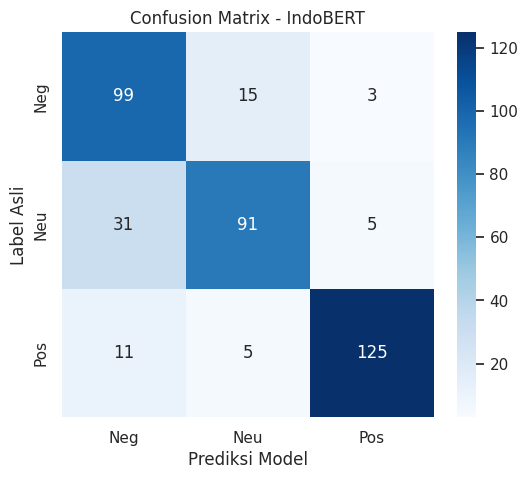


🔍 TOTAL KESALAHAN: 70 dari 385 data

🔴 KESALAHAN FATAL (Positif <-> Negatif): 14 Kasus
                                                                                                                                                                                                                                                                                   text label_str pred_str
                                                                                                                                                                                                            keamanan digital tapi kitab undang undang hukum acara pidana legalkan tolil  Negative Positive
rancangan undang undang kitab undang undang hukum acara pidana disahkan allah bakal banyak orang planga plongo bakal bilang salah apa poin tetapkan hukum berlaku lebih pro rakyat tapi kalau bermasalah antar rakyat negara bagaimana dong terus kalau bermasalah negara rakyat gmnï¸  Positive Negative
               

Map:   0%|          | 0/385 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Sedang memprediksi data test...



📊 AKURASI FINAL: 0.7974

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Negative       0.71      0.80      0.76       117
     Neutral       0.79      0.69      0.74       127
    Positive       0.89      0.89      0.89       141

    accuracy                           0.80       385
   macro avg       0.79      0.79      0.79       385
weighted avg       0.80      0.80      0.80       385



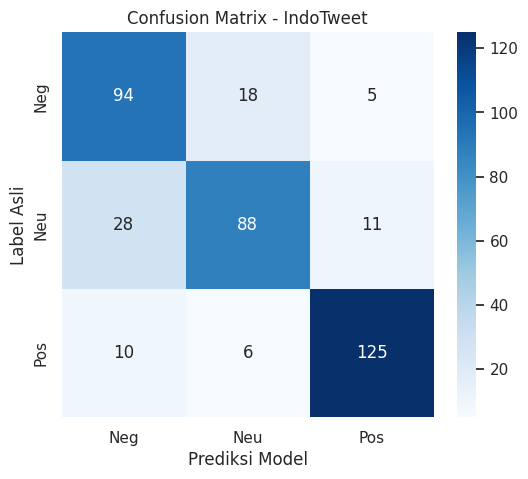


🔍 TOTAL KESALAHAN: 78 dari 385 data

🔴 KESALAHAN FATAL (Positif <-> Negatif): 15 Kasus
                                                                                                                                                                                                                                                                                   text label_str pred_str
rancangan undang undang kitab undang undang hukum acara pidana disahkan allah bakal banyak orang planga plongo bakal bilang salah apa poin tetapkan hukum berlaku lebih pro rakyat tapi kalau bermasalah antar rakyat negara bagaimana dong terus kalau bermasalah negara rakyat gmnï¸  Positive Negative
                                                                                                                            lucu banget sih kitab undang undang hukum acara pidana baru udah beri procedural safeguard ketat tapi neriakin otoriter padahal otoriter klaim baca dokumen  Positive Negative
               

In [27]:
print("📂 Menyiapkan Data Test...")
file_path = ""
possible_paths = ["data_kuhap_final_clean.csv", "/content/data_kuhap_final_clean.csv", "/kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv"]
for path in possible_paths:
    if os.path.exists(path): file_path = path; break

if not file_path:
    for root in ['/content', '/kaggle/input']:
        for d, _, f in os.walk(root):
            if "data_kuhap_final_clean.csv" in f: file_path = os.path.join(d, "data_kuhap_final_clean.csv"); break
        if file_path: break

df = pd.read_csv(file_path)
df['clean_text_final'] = df['clean_text_final'].fillna("")

_, test_texts, _, test_labels = train_test_split(
    df['clean_text_final'].tolist(),
    df['Sentimen'].tolist(),
    test_size=0.2,
    stratify=df['Sentimen'],
    random_state=42
)

df_test = pd.DataFrame({'text': test_texts, 'label': test_labels})
hf_test = Dataset.from_pandas(df_test)

target_models = ["IndoBERT", "IndoTweet"]
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

def analyze_transformer(model_name):
    model_path = f"./final_model_{model_name}_tuned"
    
    if not os.path.exists(model_path):
        print(f"⚠️ Model {model_name} tidak ditemukan di {model_path}. Skip.")
        return

    print(f"\n" + "="*60)
    print(f"🕵️‍♂️ BEDAH KASUS: {model_name}")
    print("="*60)

    try:
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
    except Exception as e:
        print(f"Gagal load model: {e}")
        return

    def tokenize(e):
        return tokenizer(e['text'], padding="max_length", truncation=True, max_length=128)
    
    tokenized_test = hf_test.map(tokenize, batched=True)

    trainer = Trainer(model=model)
    print("Sedang memprediksi data test...")
    raw_pred, _, _ = trainer.predict(tokenized_test)
    y_pred = np.argmax(raw_pred, axis=1)

    acc = accuracy_score(test_labels, y_pred)
    print(f"\n📊 AKURASI FINAL: {acc:.4f}")
    print("\nCLASSIFICATION REPORT:")
    print(classification_report(test_labels, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Neg', 'Neu', 'Pos'], 
                yticklabels=['Neg', 'Neu', 'Pos'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Label Asli')
    plt.xlabel('Prediksi Model')
    plt.show()

    df_test['pred'] = y_pred
    df_test['label_str'] = df_test['label'].map(label_map)
    df_test['pred_str'] = df_test['pred'].map(label_map)
    
    # Filter Error
    errors = df_test[df_test['label'] != df_test['pred']]
    print(f"\n🔍 TOTAL KESALAHAN: {len(errors)} dari {len(df_test)} data")

    fatal = errors[
        ((errors['label_str']=='Positive') & (errors['pred_str']=='Negative')) | 
        ((errors['label_str']=='Negative') & (errors['pred_str']=='Positive'))
    ]
    
    print(f"\n🔴 KESALAHAN FATAL (Positif <-> Negatif): {len(fatal)} Kasus")
    if not fatal.empty:
        print(fatal[['text', 'label_str', 'pred_str']].head(5).to_string(index=False))
    else:
        print("Hebat! Tidak ada kesalahan fatal (model paham polaritas).")
        
    # 2. Kesalahan Ambiguitas (Netral vs Sentimen)
    ambigu = errors[
        (errors['label_str']=='Neutral') | (errors['pred_str']=='Neutral')
    ]
    print(f"\n🟠 KESALAHAN AMBIGUITAS (Netral <-> Sentimen): {len(ambigu)} Kasus")
    if not ambigu.empty:
        print(ambigu[['text', 'label_str', 'pred_str']].head(3).to_string(index=False))
        
    print("-" * 60)

for model in target_models:
    analyze_transformer(model)

## Analisis Kesalahan (Machine Learning Model)


📘 LAPORAN ANALISIS MENDALAM: SVM (Poly)

1️⃣  PERFORMA KESELURUHAN
------------------------------
              precision    recall  f1-score   support

    Negative       0.80      0.85      0.83       114
     Neutral       0.79      0.87      0.83       134
    Positive       0.98      0.85      0.91       137

    accuracy                           0.85       385
   macro avg       0.86      0.85      0.85       385
weighted avg       0.86      0.85      0.86       385


2️⃣  PETA KESALAHAN (CONFUSION MATRIX)


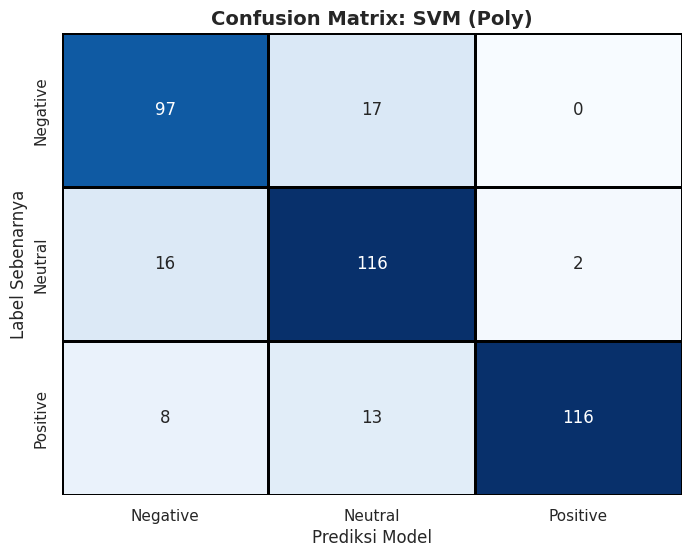


3️⃣  CONTOH TWEET YANG SALAH DITEBAK

🔸 ERROR FATAL: Positif dikira Negatif (Pesimis) (Total: 8)
   1. "rek tarima wae iyeu rancangan undang undang kitab undang undang hukum acara pidana"
      👉 Asli: Positive | Prediksi: Negative
   2. "banyak teriak darurat kitab undang undang hukum acara pidana padahal belum baca satu pasal"
      👉 Asli: Positive | Prediksi: Negative
   3. "sbnrnya apa mnjdi keistimewaan polisi kitab undang undang hukum acara pidana tugas selesai smpe penangkapn aja sdgkn dilimpahkn pengadilan jobnya jaks..."
      👉 Asli: Positive | Prediksi: Negative
   ----------------------------------------

🔸 ERROR FATAL: Negatif dikira Positif (Optimis) (Total: 0)
   (Tidak ada kesalahan tipe ini. Bagus!)

🔸 ERROR AMBIGU: Bingung membedakan Netral (Total: 48)
   1. "hemm menjawab mudahnya otoritas mengendalikan narasi undang undang komisi pemberantasan korupsi omnibuslaw putusan mahkamah konstitusi gelar pahlawan ..."
      👉 Asli: Negative | Prediksi: Neutral
   2. "benar

In [28]:
def print_error_samples(df_errors, title, limit=3):
    print(f"\n🔸 {title} (Total: {len(df_errors)})")
    if df_errors.empty:
        print("   (Tidak ada kesalahan tipe ini. Bagus!)")
        return

    for i, row in enumerate(df_errors.head(limit).itertuples(), 1):
        # Potong teks jika terlalu panjang biar tidak memenuhi layar
        text_preview = row.Teks_Asli if len(row.Teks_Asli) < 150 else row.Teks_Asli[:150] + "..."
        print(f"   {i}. \"{text_preview}\"")
        print(f"      👉 Asli: {row.Label_Benar} | Prediksi: {row.Prediksi_Model}")
    print("   " + "-"*40)

if 'final_best_model' not in locals():
    print("⚠️ Error: Jalankan Chunk 2 dulu untuk mendapatkan model terbaik.")
else:
    print(f"\n📘 LAPORAN ANALISIS MENDALAM: {final_best_entry['Model']}")
    print("="*70)

    X_err = features_db[final_best_feature_name]
    X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
        X_err, y_target, test_size=0.2, stratify=y_target, random_state=42
    )

    _, X_text_test, _, _ = train_test_split(
        df['clean_text_final'], y_target, test_size=0.2, stratify=y_target, random_state=42
    )

    y_pred_e = final_best_model.predict(X_test_e)
    target_names = ['Negative', 'Neutral', 'Positive']

    print("\n1️⃣  PERFORMA KESELURUHAN")
    print("-" * 30)
    print(classification_report(y_test_e, y_pred_e, target_names=target_names))

    print("\n2️⃣  PETA KESALAHAN (CONFUSION MATRIX)")
    cm = confusion_matrix(y_test_e, y_pred_e)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names,
                linewidths=1, linecolor='black', cbar=False)
    plt.title(f'Confusion Matrix: {final_best_entry["Model"]}', fontsize=14, fontweight='bold')
    plt.xlabel('Prediksi Model', fontsize=12)
    plt.ylabel('Label Sebenarnya', fontsize=12)
    plt.show()

    print("\n3️⃣  CONTOH TWEET YANG SALAH DITEBAK")
    print("=" * 70)

    df_err = pd.DataFrame({
        'Teks_Asli': X_text_test.values,
        'Label_Benar': y_test_e,
        'Prediksi_Model': y_pred_e
    })
    label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    df_err['Label_Benar'] = df_err['Label_Benar'].map(label_map)
    df_err['Prediksi_Model'] = df_err['Prediksi_Model'].map(label_map)

    errors = df_err[df_err['Label_Benar'] != df_err['Prediksi_Model']]

    fatal_pos_neg = errors[(errors['Label_Benar']=='Positive') & (errors['Prediksi_Model']=='Negative')]
    fatal_neg_pos = errors[(errors['Label_Benar']=='Negative') & (errors['Prediksi_Model']=='Positive')]

    ambigu = errors[(errors['Label_Benar']=='Neutral') | (errors['Prediksi_Model']=='Neutral')]

    print_error_samples(fatal_pos_neg, "ERROR FATAL: Positif dikira Negatif (Pesimis)")
    print_error_samples(fatal_neg_pos, "ERROR FATAL: Negatif dikira Positif (Optimis)")
    print_error_samples(ambigu, "ERROR AMBIGU: Bingung membedakan Netral")

    model_step = final_best_model.named_steps['clf'] if hasattr(final_best_model, 'named_steps') else final_best_model
    
    if hasattr(model_step, 'feature_importances_') or hasattr(model_step, 'coef_'):
        print("\n4️⃣  KATA KUNCI PENENTU (Top 10)")
        print("-" * 30)
        
        try:
            from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
            if 'TF-IDF' in final_best_feature_name: vec = TfidfVectorizer(max_features=5000)
            else: vec = CountVectorizer(max_features=5000)
            vec.fit(df['clean_text_final'].fillna(""))
            feature_names = np.array(vec.get_feature_names_out())

            if hasattr(model_step, 'feature_importances_'):
                importances = model_step.feature_importances_
            elif hasattr(model_step, 'coef_'):
                importances = np.mean(np.abs(model_step.coef_), axis=0)
 
            indices = np.argsort(importances)[::-1][:10]
            top_features = pd.DataFrame({
                'Kata Kunci': feature_names[indices],
                'Bobot Pengaruh': importances[indices]
            })
            print(top_features.to_string(index=False))
            
        except Exception as e:
            print(f"(Gagal mengekstrak kata kunci: {e})")
    else:
        print("\n4️⃣  KATA KUNCI PENENTU")
        print("   (Model ini tidak mendukung ekstraksi fitur kata per kata secara langsung)")
    
    print("\n" + "="*70)

## Aspect Based Sentiment Analysis & Topic Modeling

In [29]:
def print_separator(title):
    print(f"\n{'='*70}\n{title}\n{'='*70}")

def print_topic_samples(topic_id, topic_name, df_data, limit=3):
    print(f"\n🔹 CONTOH TWEET: {topic_name} (Topik {topic_id})")
    samples = df_data[df_data['Topic'] == topic_id].head(limit)['full_text']
    for i, txt in enumerate(samples, 1):
        preview = txt if len(txt) < 120 else txt[:120] + "..."
        print(f"   {i}. \"{preview}\"")

print_separator("📊 ANALISIS ASPEK & TOPIK (BERTopic)")

file_path = ""
for root in ['/content', '/kaggle/input']:
    for d, _, f in os.walk(root):
        if "data_kuhap_final_clean.csv" in f:
            file_path = os.path.join(d, "data_kuhap_final_clean.csv"); break
    if file_path: break
if not file_path: raise FileNotFoundError("❌ File CSV tidak ditemukan!")

df = pd.read_csv(file_path)
df['clean_text_final'] = df['clean_text_final'].fillna("")

df_neg = df[df['Sentimen'] == 0].copy()
docs = df_neg['clean_text_final'].tolist()
print(f"✅ Memproses {len(docs)} tweet bersentimen NEGATIF...")

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english", min_df=5)

topic_model = BERTopic(
    language="multilingual",
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True,
    min_topic_size=5,
    nr_topics="auto" 
)

topics, probs = topic_model.fit_transform(docs)

print_separator("1️⃣  DAFTAR ISU UTAMA (TOPICS)")

freq = topic_model.get_topic_info()
freq['Clean_Name'] = freq['Name'].apply(lambda x: "_".join(x.split("_")[1:]))

print(f"{'ID':<5} | {'Count':<6} | {'Nama Topik (Kata Kunci Utama)':<40}")
print("-" * 60)
for index, row in freq.head(11).iterrows(): 
    if row['Topic'] == -1:
        print(f"{row['Topic']:<5} | {row['Count']:<6} | [Outlier / Isu Campuran]")
    else:
        print(f"{row['Topic']:<5} | {row['Count']:<6} | {row['Clean_Name']}")

print_separator("2️⃣  BEDAH DETAIL 3 TOPIK TERBESAR")

df_neg['Topic'] = topics

top_3_topics = freq[freq['Topic'] != -1].head(3)['Topic'].tolist()

for t_id in top_3_topics:
    t_name = freq[freq['Topic'] == t_id]['Clean_Name'].values[0]
    
    print(f"\n📌 TOPIK {t_id}: {t_name.upper()}")
    print("-" * 40)

    keywords = topic_model.get_topic(t_id)
    kw_list = [k[0] for k in keywords[:8]] 
    print(f"🔑 Kata Kunci: {', '.join(kw_list)}")

    print_topic_samples(t_id, t_name, df_neg)

print_separator("3️⃣  EXPORT HASIL")
os.makedirs("visualisasi_topik", exist_ok=True)

fig_bar = topic_model.visualize_barchart(top_n_topics=8)
fig_bar.write_html("visualisasi_topik/1_keywords_bar.html")
print("✅ Grafik '1_keywords_bar.html' tersimpan.")

fig_hierarchy = topic_model.visualize_hierarchy(top_n_topics=15)
fig_hierarchy.write_html("visualisasi_topik/2_hierarchy.html")
print("✅ Grafik '2_hierarchy.html' tersimpan.")

df_neg['Topic_Name'] = df_neg['Topic'].map(
    lambda t: freq[freq['Topic'] == t]['Clean_Name'].values[0] if t in freq['Topic'].values else "Unknown"
)
save_path = "hasil_analisis_topik_negatif.csv"
df_neg[['full_text', 'Topic', 'Topic_Name']].to_csv(save_path, index=False)
print(f"✅ Data lengkap tersimpan di '{save_path}'")


📊 ANALISIS ASPEK & TOPIK (BERTopic)
✅ Memproses 571 tweet bersentimen NEGATIF...


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/18 [00:00<?, ?it/s]

2025-12-07 09:26:23,083 - BERTopic - Transformed documents to Embeddings
2025-12-07 09:26:32,234 - BERTopic - Reduced dimensionality
2025-12-07 09:26:32,331 - BERTopic - Clustered reduced embeddings
2025-12-07 09:26:32,487 - BERTopic - Reduced number of topics from 22 to 22



1️⃣  DAFTAR ISU UTAMA (TOPICS)
ID    | Count  | Nama Topik (Kata Kunci Utama)           
------------------------------------------------------------
-1    | 176    | [Outlier / Isu Campuran]
0     | 52     | indonesia_undang_rakyat_undang undang
1     | 50     | kitab undang_undang hukum_kitab_acara pidana
2     | 40     | rancangan_rancangan undang_undang_undang kitab
3     | 30     | tidak_undang_undang undang_undang kitab
4     | 27     | kamu_undang_aja_undang undang
5     | 24     | tidak_undang_jangan_undang undang
6     | 24     | baru_pidana baru_kitab undang_undang hukum
7     | 21     | aparat_hukum_kewenangan_undang
8     | 18     | rakyat_dewan_dewan perwakilan_perwakilan
9     | 18     | polisi_jadi_rakyat_tidak

2️⃣  BEDAH DETAIL 3 TOPIK TERBESAR

📌 TOPIK 0: INDONESIA_UNDANG_RAKYAT_UNDANG UNDANG
----------------------------------------
🔑 Kata Kunci: indonesia, undang, rakyat, undang undang, rancangan, rancangan undang, perwakilan, perwakilan rakyat

🔹 CONTOH TWEET: indo

In [30]:
def print_separator(title, char="=", length=80):
    print(f"\n{char*length}\n{title}\n{char*length}")

def get_file_path():
    for root in ['/content', '/kaggle/input']:
        for d, _, f in os.walk(root):
            if "data_kuhap_final_clean.csv" in f:
                return os.path.join(d, "data_kuhap_final_clean.csv")
            for file in f:
                if file.endswith(".csv") and "clean" in file:
                    return os.path.join(d, file)
    return None

print_separator("📂 MEMUAT DATASET")
file_path = get_file_path()
if not file_path: raise FileNotFoundError("❌ File CSV tidak ditemukan!")

print(f"✅ Menggunakan file: {file_path}")
df = pd.read_csv(file_path)
df['clean_text_final'] = df['clean_text_final'].fillna("")

use_temporal = False
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    df = df.dropna(subset=['created_at'])
    use_temporal = True
    print("✅ Analisis Temporal (Topics over Time) AKTIF.")

sentiments = {
    0: "NEGATIVE",  
    1: "NEUTRAL",   
    2: "POSITIVE"   
}
for sent_code, sent_name in sentiments.items():
    print_separator(f"🚀 ANALISIS MENDALAM: SENTIMEN {sent_name}")

    df_subset = df[df['Sentimen'] == sent_code].copy()
    docs = df_subset['clean_text_final'].tolist()
    timestamps = df_subset['created_at'].tolist() if use_temporal else None
    
    count_docs = len(docs)
    print(f"📊 Jumlah Dokumen: {count_docs}")
    
    if count_docs < 10:
        print(f"⚠️ Data terlalu sedikit (<10) untuk analisis topik mendalam. Skip.")
        continue

    output_dir = f"absa_results/{sent_name}"
    os.makedirs(output_dir, exist_ok=True)

    vectorizer_model = CountVectorizer(ngram_range=(1, 3), min_df=2)

    min_size = 5 if count_docs > 100 else 2
    
    topic_model = BERTopic(
        language="multilingual",
        vectorizer_model=vectorizer_model,
        verbose=True,
        min_topic_size=min_size,
        nr_topics="auto", 
        calculate_probabilities=False 
    )

    try:
        topics, probs = topic_model.fit_transform(docs)
    except Exception as e:
        print(f"❌ Gagal training topik: {e}")
        continue

    freq = topic_model.get_topic_info()

    freq['Clean_Name'] = freq['Name'].apply(lambda x: "_".join(x.split("_")[1:]))
    
    print("\n📌 DAFTAR TOPIK TERBENTUK:")
    print(f"{'ID':<4} | {'Count':<5} | {'Nama Topik (Representasi)'}")
    print("-" * 60)
    for index, row in freq.head(10).iterrows():
        label = "[Outlier]" if row['Topic'] == -1 else row['Clean_Name']
        print(f"{row['Topic']:<4} | {row['Count']:<5} | {label}")

    print_separator(f"🔍 BEDAH DETAIL ASPEK ({sent_name})")

    real_topics = freq[freq['Topic'] != -1]['Topic'].head(5).tolist()
    
    for t_id in real_topics:
        t_info = freq[freq['Topic'] == t_id].iloc[0]
        print(f"\n🔹 TOPIK {t_id}: {t_info['Clean_Name'].upper()} (Jumlah: {t_info['Count']} Tweet)")
        print("   🔑 Kata Kunci Utama (Bobot):")
        keywords = topic_model.get_topic(t_id)
        kw_str = ", ".join([f"{k[0]} ({k[1]:.2f})" for k in keywords[:8]])
        print(f"      {kw_str}")

        print("   📄 Contoh Tweet Representatif:")
        df_subset['Temp_Topic'] = topics
        samples = df_subset[df_subset['Temp_Topic'] == t_id]['full_text'].head(3).tolist()
        
        for i, txt in enumerate(samples, 1):
            clean_txt = txt.replace('\n', ' ')
            preview = clean_txt if len(clean_txt) < 150 else clean_txt[:150] + "..."
            print(f"      {i}. \"{preview}\"")

    print(f"\n💾 Menyimpan Visualisasi ke '{output_dir}/'...")

    topic_model.visualize_barchart(top_n_topics=10).write_html(f"{output_dir}/keywords.html")

    topic_model.visualize_hierarchy(top_n_topics=20).write_html(f"{output_dir}/hierarchy.html")
    
    topic_model.visualize_heatmap(top_n_topics=20).write_html(f"{output_dir}/heatmap.html")

    if use_temporal:
        try:
            topics_over_time = topic_model.topics_over_time(docs, timestamps, nr_bins=10)
            topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=5).write_html(f"{output_dir}/timeline.html")
            print("   ✅ Grafik Timeline berhasil dibuat.")
        except Exception as e:
            print(f"   ⚠️ Gagal membuat Timeline: {e}")

    topic_map = {row['Topic']: row['Clean_Name'] for _, row in freq.iterrows()}
    df_subset['Topic_ID'] = topics
    df_subset['Topic_Name'] = df_subset['Topic_ID'].map(lambda x: topic_map.get(x, "Outlier"))
    
    save_csv = f"{output_dir}/hasil_topik_{sent_name.lower()}.csv"
    df_subset[['created_at', 'full_text', 'Topic_ID', 'Topic_Name']].to_csv(save_csv, index=False)
    print(f"✅ Data CSV tersimpan di: {save_csv}")

print_separator("🎉 SELESAI! SEMUA ANALISIS ABSA TUNTAS")
print("Tips: Download folder 'absa_results' untuk melihat file HTML visualisasi.")


📂 MEMUAT DATASET
✅ Menggunakan file: /kaggle/input/dataset-kelompok-12/data_kuhap_final_clean.csv
✅ Analisis Temporal (Topics over Time) AKTIF.

🚀 ANALISIS MENDALAM: SENTIMEN NEGATIVE
📊 Jumlah Dokumen: 571


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

2025-12-07 09:26:37,600 - BERTopic - Transformed documents to Embeddings
2025-12-07 09:26:38,390 - BERTopic - Reduced dimensionality
2025-12-07 09:26:38,415 - BERTopic - Clustered reduced embeddings
2025-12-07 09:26:38,583 - BERTopic - Reduced number of topics from 24 to 24



📌 DAFTAR TOPIK TERBENTUK:
ID   | Count | Nama Topik (Representasi)
------------------------------------------------------------
-1   | 204   | [Outlier]
0    | 52    | indonesia_republik indonesia_republik_undang
1    | 41    | undang_rancangan_rancangan undang_rancangan undang undang
2    | 36    | kitab undang_kitab undang undang_undang hukum_undang undang hukum
3    | 29    | undang_tidak_undang undang_pidana
4    | 25    | undang_hukum_undang undang_jangan
5    | 25    | baru_acara pidana baru_pidana baru_hukum
6    | 22    | undang_undang undang_aja_banget
7    | 13    | rakyat_dewan_dewan perwakilan_dewan perwakilan rakyat
8    | 12    | fuck_the_besar_lalu

🔍 BEDAH DETAIL ASPEK (NEGATIVE)

🔹 TOPIK 0: INDONESIA_REPUBLIK INDONESIA_REPUBLIK_UNDANG (Jumlah: 52 Tweet)
   🔑 Kata Kunci Utama (Bobot):
      indonesia (0.07), republik indonesia (0.05), republik (0.05), undang (0.03), kepolisian (0.03), undang undang (0.03), rakyat (0.03), rancangan (0.03)
   📄 Contoh Tweet Representatif

10it [00:00, 51.91it/s]


   ✅ Grafik Timeline berhasil dibuat.
✅ Data CSV tersimpan di: absa_results/NEGATIVE/hasil_topik_negative.csv

🚀 ANALISIS MENDALAM: SENTIMEN NEUTRAL
📊 Jumlah Dokumen: 670


Batches:   0%|          | 0/21 [00:00<?, ?it/s]

2025-12-07 09:26:43,496 - BERTopic - Transformed documents to Embeddings
2025-12-07 09:26:44,440 - BERTopic - Reduced dimensionality
2025-12-07 09:26:44,464 - BERTopic - Clustered reduced embeddings
2025-12-07 09:26:44,625 - BERTopic - Reduced number of topics from 9 to 9



📌 DAFTAR TOPIK TERBENTUK:
ID   | Count | Nama Topik (Representasi)
------------------------------------------------------------
-1   | 1     | [Outlier]
0    | 529   | undang_undang undang_hukum_pidana
1    | 80    | indonesia_undang_republik_republik indonesia
2    | 17    | shopeepay_amp_download_shopee
3    | 10    | shopee_dapatkan bonus_menggunakan_bonus saldo shopee
4    | 9     | shopeepay_saldo_ffjwvwp diskon promo_job
5    | 9     | login dg_dg akun shopee_dg akun_login dg akun
6    | 8     | shopeepay_kodenya_ffjwvwp upgrade_klaim saldo
7    | 7     | min_diskon promo freelance_promo freelance job_promo freelance

🔍 BEDAH DETAIL ASPEK (NEUTRAL)

🔹 TOPIK 0: UNDANG_UNDANG UNDANG_HUKUM_PIDANA (Jumlah: 529 Tweet)
   🔑 Kata Kunci Utama (Bobot):
      undang (0.09), undang undang (0.07), hukum (0.06), pidana (0.06), acara (0.06), acara pidana (0.06), hukum acara (0.06), hukum acara pidana (0.06)
   📄 Contoh Tweet Representatif:
      1. "@Ajierz @jatamnas banyak yg bilang praktekÂ

10it [00:00, 85.35it/s]


   ✅ Grafik Timeline berhasil dibuat.
✅ Data CSV tersimpan di: absa_results/NEUTRAL/hasil_topik_neutral.csv

🚀 ANALISIS MENDALAM: SENTIMEN POSITIVE
📊 Jumlah Dokumen: 683


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

2025-12-07 09:26:49,031 - BERTopic - Transformed documents to Embeddings
2025-12-07 09:26:50,008 - BERTopic - Reduced dimensionality
2025-12-07 09:26:50,031 - BERTopic - Clustered reduced embeddings
2025-12-07 09:26:50,217 - BERTopic - Reduced number of topics from 20 to 20



📌 DAFTAR TOPIK TERBENTUK:
ID   | Count | Nama Topik (Representasi)
------------------------------------------------------------
-1   | 137   | [Outlier]
0    | 151   | hukum_undang_pidana_hukum acara pidana
1    | 53    | penyadapan_undang_undang undang_hoax
2    | 46    | penangkapan_ketat_undang_undang undang
3    | 45    | undang_undang undang_hoax_izin
4    | 39    | undang_panik_undang undang_hoax
5    | 36    | undang_hoax_undang undang_penyadapan
6    | 31    | undang_hoax_undang undang_hukum
7    | 31    | hoax_undang_undang undang_lawan disinformasi hoax
8    | 19    | indonesia_lebih_acara pidana baru_pidana baru

🔍 BEDAH DETAIL ASPEK (POSITIVE)

🔹 TOPIK 0: HUKUM_UNDANG_PIDANA_HUKUM ACARA PIDANA (Jumlah: 151 Tweet)
   🔑 Kata Kunci Utama (Bobot):
      hukum (0.05), undang (0.04), pidana (0.04), hukum acara pidana (0.04), hukum acara (0.04), acara pidana (0.04), acara (0.04), kitab (0.04)
   📄 Contoh Tweet Representatif:
      1. "Pasal-pasal itu bakal membuka perlakuan sewen

10it [00:00, 77.35it/s]

   ✅ Grafik Timeline berhasil dibuat.
✅ Data CSV tersimpan di: absa_results/POSITIVE/hasil_topik_positive.csv

🎉 SELESAI! SEMUA ANALISIS ABSA TUNTAS
Tips: Download folder 'absa_results' untuk melihat file HTML visualisasi.
